In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
from tensorflow.keras import initializers, activations

In [22]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(train_data, train_labels), (test_data, val_data) = reuters.load_data(num_words=10000, test_split=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(train_labels))


8982
2246
2246
8982


In [23]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

train_data = one_hot_encoding(train_data)
test_data = one_hot_encoding(test_data)

    
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
train_labels = utils.to_categorical(train_labels)
val_data = utils.to_categorical(val_data)

In [24]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000, )))
model.add(layers.Dense(128, kernel_initializer=initializers.GlorotUniform()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))    
model.add(layers.Dense(46, activation='softmax'))

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [26]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
                                           
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels,
                    epochs=100,
                    validation_data=(test_data, val_data),
                    callbacks=[check_point_cb, early_stopping_cb])  

Epoch 1/100
281/281 [==============================] - 3s 7ms/step - loss: 1.4632 - accuracy: 0.6798 - val_loss: 1.0740 - val_accuracy: 0.7582
Epoch 2/100
281/281 [==============================] - 1s 5ms/step - loss: 0.8373 - accuracy: 0.8081 - val_loss: 1.0011 - val_accuracy: 0.7823
Epoch 3/100
281/281 [==============================] - 1s 5ms/step - loss: 0.6080 - accuracy: 0.8586 - val_loss: 1.0988 - val_accuracy: 0.7912
Epoch 4/100
281/281 [==============================] - 1s 5ms/step - loss: 0.4710 - accuracy: 0.8873 - val_loss: 1.2009 - val_accuracy: 0.7965
Epoch 5/100
281/281 [==============================] - 1s 5ms/step - loss: 0.3896 - accuracy: 0.9074 - val_loss: 1.2028 - val_accuracy: 0.8041
Epoch 6/100
281/281 [==============================] - 2s 5ms/step - loss: 0.3353 - accuracy: 0.9185 - val_loss: 1.2708 - val_accuracy: 0.7992
Epoch 7/100
281/281 [==============================] - 1s 5ms/step - loss: 0.3014 - accuracy: 0.9242 - val_loss: 1.3337 - val_accuracy: 0.7952

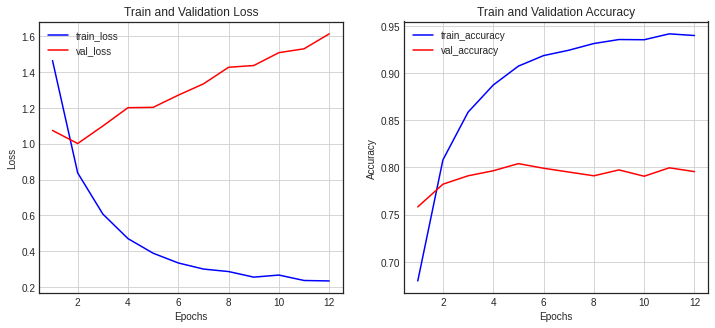

In [27]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [28]:
model.evaluate(test_data, val_data)

71/71 [==============================] - 0s 3ms/step - loss: 1.0011 - accuracy: 0.7823


[1.0010721683502197, 0.7822796106338501]